In [77]:
#importing the required libraries for the project
import pandas as pd
import requests
import tweepy
import json
import time
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


## Gather Data

#### As part of gathering, we obtain data from three different sources.
- From a given csv file.
- From a given url, using requests method.
- From twitter, using tweepy API.

### Gather Data from a given csv file

In [78]:
# read twitter-archive-enchanced.csv file and store in data frame df_tweet_arch
df_tweet_arch = pd.read_csv('twitter-archive-enhanced.csv')

### Gather Data from a given url

In [140]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# using requests library download the file from given url and store in a local tsv file
response= requests.get(url)

with open(url.split('/')[-1],mode='wb')as file:
    file.write(response.content)

#load the downloaded file image_prediction.tsv into data frame df_image_pred    
df_image_pred=pd.read_csv('image-predictions.tsv',delimiter='\t')

### Gather Data from Twitter API

In [4]:
# Autontification to twetter API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Construct the API instance
api = tweepy.API(auth, wait_on_rate_limit=True,wait_on_rate_limit_notify=True)


In [5]:
tweet_file=open('tweet_json.txt','w')
tweet_file.write('tweet_id retweet_count favorite_count''\n')

for tweet_id in df_tweet_arch.tweet_id:
    try:
        tweet_info=api.get_status(str(tweet_id),tweet_mode='extended')
        tweet_file.write(str(tweet_id)+' '+str(tweet_info.retweet_count)+' '+str(tweet_info.favorite_count)+'\n')
                   #,' ',str(retweet_count),' ',str(favorite_count)+'\n')
    except Exception as e:
        print('error',tweet_id)
tweet_file.close()

error 888202515573088257
error 873697596434513921
error 869988702071779329
error 866816280283807744
error 861769973181624320
error 845459076796616705
error 842892208864923648
error 837012587749474308
error 827228250799742977
error 802247111496568832
error 775096608509886464
error 771004394259247104
error 770743923962707968


Rate limit reached. Sleeping for: 677


error 754011816964026368


Rate limit reached. Sleeping for: 681


In [72]:
df_twitter=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet_json.txt','r')as file:
    for line in file:
        tweet_id,retweet_count,favorite_count=line[:-1].split(' ')
        df_twitter=df_twitter.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count},ignore_index=True)

## Assess Data

##### The next step, is we need to assess the data visually and programmatically for quality and tidiness issues

In [80]:
df_tweet_arch.info()
df_tweet_arch.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1209,715696743237730304,NaN,NaN,2016-04-01 00:26:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's a Lithuanian High-Steppin Stic...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715696743...,10,10,Toby,None,None,None,None
1201,716447146686459905,NaN,NaN,2016-04-03 02:08:05 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Ozzy. He's acrobatic af. Legendary pup...,NaN,NaN,NaN,https://vine.co/v/eMmXVPn5eQK,13,10,Ozzy,None,None,pupper,None
2239,667937095915278337,NaN,NaN,2015-11-21 05:26:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667937095...,3,10,None,None,None,None,None
526,808838249661788160,NaN,NaN,2016-12-14 00:57:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ito. He'll be your uber driver tonight...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/808838249...,13,10,Ito,None,None,None,None
1131,728986383096946689,NaN,NaN,2016-05-07 16:34:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Puff. He started out on the streets (f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/728986383...,11,10,Puff,None,None,None,None


In [8]:
df_tweet_arch[df_tweet_arch.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [9]:
df_tweet_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [10]:
df_tweet_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [11]:
df_image_pred.info()
df_image_pred.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [12]:
df_image_pred.jpg_url.value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                                            2
https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg                                            2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg                                            2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg                                            2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CpmyNumW8AAAJGj.jpg                                            2
https://pbs.twimg.com/media/Ct2qO5PXEAE6eB0.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/817423809049493505/pu/img/5OF

In [42]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2343 entries, 0 to 2342
Data columns (total 3 columns):
tweet_id          2343 non-null object
retweet_count     2343 non-null object
favorite_count    2343 non-null object
dtypes: object(3)
memory usage: 55.0+ KB


In [71]:
# just trying to understand what kind of dog, based on tweet_id whose retweet count is highest from df_twitter dataset
#df_twitter.loc[df_twitter['retweet_count'] == df_twitter['retweet_count'].max()]
#df_twitter = df_twitter.drop(df_twitter.index[0])
#df_twitter['retweet_count'].max()
#df_twitter[df_twitter['retweet_count'] == '9992']['tweet_id']
df_tweet_arch[df_tweet_arch['tweet_id'] == 889665388333682689]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo


## Quality
### df_tweet_arch dataset

- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be of objects (string) instead of float.
- Extracting source, a text will be easy to read/visuallize rather than hyperlink data.
- We only want ratings with images. Some ratings does not have images.
- retweeted_status_timestamp, timestamp should be datetime instead of object (string).
- index zero is having column name in case of df_twitter dataframe, let us drop the index 0 row.
- Dog names are not correct in some cases.
- The numerator and denominator columns have invalid values.

### df_image_pred dataset
- some tweets id's have same jpg url's.
- df_image_pred is having 2075 entries, compared to df_tweet_arch 2356 entries, it looks some entries are missing in df_image_pred dataset.

## Tidiness

- df_twitter,df_image_pred should be merged with df_tweet_arch.
- in df_tweet_arch, the columns 'doggo', 'floofer', 'pupper','puppo' should be named as one column.
- a new column indicating dog gender


## Clean the Data

In [104]:
df_tweet_arch_clean=df_tweet_arch.copy()
df_image_pred_clean=df_image_pred.copy()
df_twitter_clean=df_twitter.copy()

## Issue

#### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should be of objects (string) instead of float.

## Define

#### let us astype(str) function to convert to string object

## Code

In [105]:
#df_tweet_arch_clean[df_tweet_arch_clean['in_reply_to_status_id'].isnull()]
df_tweet_arch_clean['in_reply_to_status_id'].fillna(0, inplace=True)
df_tweet_arch_clean['in_reply_to_status_id'] = df_tweet_arch_clean['in_reply_to_status_id'].astype(str)

#df_tweet_arch_clean[df_tweet_arch_clean['in_reply_to_user_id'].isnull()]
df_tweet_arch_clean['in_reply_to_user_id'].fillna(0, inplace=True)
df_tweet_arch_clean['in_reply_to_user_id'] = df_tweet_arch_clean['in_reply_to_user_id'].astype(str)

#df_tweet_arch_clean[df_tweet_arch_clean['retweeted_status_id'].isnull()]
df_tweet_arch_clean['retweeted_status_id'].fillna(0, inplace=True)
df_tweet_arch_clean['retweeted_status_id'] = df_tweet_arch_clean['retweeted_status_id'].astype(str)

#df_tweet_arch_clean[df_tweet_arch_clean['retweeted_status_user_id'].isnull()]
df_tweet_arch_clean['retweeted_status_user_id'].fillna(0, inplace=True)
df_tweet_arch_clean['retweeted_status_user_id'] = df_tweet_arch_clean['retweeted_status_user_id'].astype(str)

## Test

In [106]:
df_tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         2356 non-null object
in_reply_to_user_id           2356 non-null object
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           2356 non-null object
retweeted_status_user_id      2356 non-null object
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: int64(3), object(14)
m

## Issue

#### Extracting source, a text will be easy to read/visuallize rather than hyperlink data

## Define

#### using findall function from regex, to extract the text

## Code

In [107]:
df_tweet_arch_clean['source'] = df_tweet_arch_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

## Test

In [108]:
df_tweet_arch_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

## Issue

#### We only want ratings with images. Some ratings does not have images.

## Define

#### df_image_pred_clean has 2075 tweets and all tweets have images, whereas df_tweet_arch_clean have 2356 entries, we shall retain only those records which have images in df_tweet_arch_clean dataset, let us drop the columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp from the clean data. i feel we are not using those in further analysis.

## Code

In [109]:
#df_image_pred_clean[df_image_pred_clean['img_num'].isnull()]
tweet_image_exist=df_image_pred_clean[['tweet_id']]
df_tweet_arch_clean=pd.merge(df_tweet_arch_clean,tweet_image_exist,on='tweet_id')
df_tweet_arch_clean = df_tweet_arch_clean.drop('retweeted_status_id', 1)
df_tweet_arch_clean = df_tweet_arch_clean.drop('retweeted_status_user_id', 1)
df_tweet_arch_clean = df_tweet_arch_clean.drop('retweeted_status_timestamp', 1)

## Test

In [110]:
df_image_pred_clean.info()
df_tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id                 2075 non-null int64
in_reply_to_status_id    2075 non-null object
in_reply_to_user_id      2075 non-null object
timestamp                2075 non-null object
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2075 non-null object
r

## Issue

#### timestamp should be datetime instead of object (string).

## Define

#### Use pandas.to_datetime to convert string object to data time format

## Code

In [113]:
df_tweet_arch_clean['timestamp'] = pd.to_datetime(df_tweet_arch_clean['timestamp'])


## Test

In [114]:
df_tweet_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id                 2075 non-null int64
in_reply_to_status_id    2075 non-null object
in_reply_to_user_id      2075 non-null object
timestamp                2075 non-null datetime64[ns]
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2075 non-null object
rating_numerator         2075 non-null int64
rating_denominator       2075 non-null int64
name                     2075 non-null object
doggo                    2075 non-null object
floofer                  2075 non-null object
pupper                   2075 non-null object
puppo                    2075 non-null object
dtypes: datetime64[ns](1), int64(3), object(10)
memory usage: 243.2+ KB


## Issue

#### - index zero is having column name in case of df_twitter dataframe, let us drop the index 0 row.

## Define

#### let us use drop function, since we know the index number, let us provide the index in order to delete the row

## Code

In [115]:
df_twitter.head(5)
df_twitter = df_twitter.drop(df_twitter.index[0])

## Test

In [116]:
df_twitter.head(5)

,tweet_id,retweet_count,favorite_count
2,892177421306343426,6232,32954
3,891815181378084864,4131,24824
4,891689557279858688,8583,41809
5,891327558926688256,9317,39980
6,891087950875897856,3085,20061


## Issue

#### Dog names are not correct in some cases.

## Define

#### using loc function to compare name variable against a list of invalid name and assign them as Null

## Code

In [117]:
cnt_list = ['a','actually','all','an','by','such','not','None','the','very','unacceptable','my']
df_tweet_arch_clean.loc[df_tweet_arch_clean['name'].isin(cnt_list),'name'] = 'NaN'

## Test

In [118]:
df_tweet_arch_clean[df_tweet_arch_clean['name'].isin(cnt_list)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo



## Issue

#### The numerator and denominator columns have invalid values.

## Define

#### let us use, str.extract regex function on text column to extract numerator and denominator

## Code

In [119]:
ratings = df_tweet_arch_clean['text'].str.extract(('(\d+(\.\d+)|(\d+))\/(\d+)'), expand=False)


In [120]:
df_tweet_arch_clean['rating_numerator']=ratings[0:][0].astype(float)
df_tweet_arch_clean['rating_denominator']=ratings[0:][3].astype(float)


## Issue

#### new column to specify the gender of the dog.

## Define

#### Let us make two list, indicating all the pronoun's for male and female and parse the text column to get a match
#### and will append gender list accordingly.

## Code

In [121]:
male = ['He', 'he', 'him', 'his', "he's", 'himself']
female = ['She', 'she', 'her', 'hers', 'herself', "she's"]

gender = []

for text in df_tweet_arch_clean['text']:
    if any(map(lambda v:v in male, text.split())):
        gender.append('male')
    elif any(map(lambda v:v in female, text.split())):
        gender.append('female')
    else:
        gender.append('NaN')


df_tweet_arch_clean['gender'] = gender


## Test

In [122]:
 df_tweet_arch_clean.gender.value_counts()

NaN       1180
male       654
female     241
Name: gender, dtype: int64

## Issue

#### in df_tweet_arch, the columns 'doggo', 'floofer', 'pupper','puppo' should be named as one column.

## Define

#### Let us use melt function, to drop those column and retain it's value in new column dog_stage, each tweet_id will be duplicated
#### four times, we need to drop the duplicates.

## Code

In [123]:
columns_to_drop = ['doggo','floofer','pupper','puppo']
columns_to_drop
df_tweet_arch_clean.columns.tolist()
colums_to_stay = [x for x in df_tweet_arch_clean.columns.tolist() if x not in columns_to_drop]
colums_to_stay
df_tweet_arch_clean = pd.melt(df_tweet_arch_clean, id_vars = colums_to_stay, value_vars = columns_to_drop, 
                              var_name='stages', value_name='dog_stage')
df_tweet_arch_clean = df_tweet_arch_clean.drop('stages', 1)
df_tweet_arch_clean = df_tweet_arch_clean.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

## Test

In [124]:
df_tweet_arch_clean.dog_stage.value_counts()

None       1754
pupper      222
doggo        67
puppo        24
floofer       8
Name: dog_stage, dtype: int64

## Issue

#### df_twitter,df_image_pred should be merged with df_tweet_arch.

## Define

#### Let us use melt function, to drop those column and retain it's value in new column dog_stage, each tweet_id will be duplicated
#### four times, we need to drop the duplicates.

## Code
   

In [125]:
df_tweet_arch_clean['tweet_id'] = df_tweet_arch_clean['tweet_id'].astype(str)
df_master = pd.merge(df_tweet_arch_clean, df_image_pred_clean, how = 'left', on = ['tweet_id'] )
df_master = pd.merge(df_master, df_twitter_clean, how = 'left', on = ['tweet_id'])

## Test

In [126]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 25 columns):
tweet_id                 2075 non-null object
in_reply_to_status_id    2075 non-null object
in_reply_to_user_id      2075 non-null object
timestamp                2075 non-null datetime64[ns]
source                   2075 non-null object
text                     2075 non-null object
expanded_urls            2075 non-null object
rating_numerator         2075 non-null float64
rating_denominator       2075 non-null float64
name                     2075 non-null object
gender                   2075 non-null object
dog_stage                2075 non-null object
jpg_url                  0 non-null object
img_num                  0 non-null float64
p1                       0 non-null object
p1_conf                  0 non-null float64
p1_dog                   0 non-null object
p2                       0 non-null object
p2_conf                  0 non-null float64
p2_dog                   0 

In [127]:
df_master = df_master.drop_duplicates()

In [128]:
df_master['gender'] = df_master['gender'].astype(str)
df_master = df_master[~df_master['favorite_count'].isnull()]
df_master['favorite_count'] = df_master['favorite_count'].astype(int)
df_master['retweet_count'] = df_master['retweet_count'].astype(int)

In [129]:
df_master = df_master.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

In [130]:
df_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

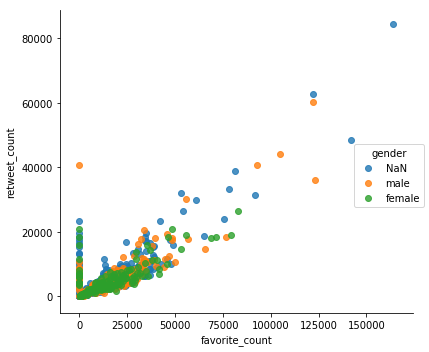

In [131]:
plt.figure(figsize=plt.figaspect(1))
sns.lmplot(x="favorite_count", y="retweet_count",data=df_master, hue='gender', fit_reg=False)
plt.tight_layout()

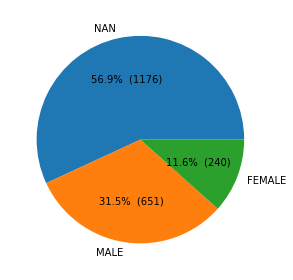

In [132]:
# make the pie circular by setting the aspect ratio to 1
plt.figure(figsize=plt.figaspect(1))
values = df_master.gender.value_counts().values
labels = [x.upper() for x in list(df_master.gender.value_counts().index)]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.tight_layout()
plt.savefig("gender_pie_chart.png")

In [133]:
df_master[df_master['retweet_count'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,gender,dog_stage,jpg_url,retweet_count,favorite_count


In [134]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2067 entries, 0 to 2074
Data columns (total 15 columns):
tweet_id                 2067 non-null object
in_reply_to_status_id    2067 non-null object
in_reply_to_user_id      2067 non-null object
timestamp                2067 non-null datetime64[ns]
source                   2067 non-null object
text                     2067 non-null object
expanded_urls            2067 non-null object
rating_numerator         2067 non-null float64
rating_denominator       2067 non-null float64
name                     2067 non-null object
gender                   2067 non-null object
dog_stage                2067 non-null object
jpg_url                  0 non-null object
retweet_count            2067 non-null int64
favorite_count           2067 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 338.4+ KB


In [135]:
df_master['rating'] = df_master['rating_numerator'] / df_master['rating_denominator']

In [136]:
df_master['rating'].describe()

count    2067.000000
mean        1.165342
std         3.991939
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
Name: rating, dtype: float64

### Insights
- The mean for rating is 1.16
- Posts with extreme ratings get more favorites and retweets.
- pupper gets the lowest favorite counts and retweet counts and rating.